In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import plotly.graph_objects as go

In [2]:
def convert_combined(sub_df):
      # transpose the dataframe
      sub_df_T = sub_df.T
      
      # rename the first row to 'Value'
      # sub_df_T = sub_df_T.rename(columns={1: 'Value'})
      
      # remove the first row
      sub_df_T = sub_df_T.iloc[1:]
      # add the name to the first column
      # sub_df_T = sub_df_T.rename_axis('Date').reset_index()
      
      date = sub_df_T.index.values
      value = sub_df_T.iloc[:, 0].values
      combined_df = pd.DataFrame({"Date": date, "Value": value})
      
      # convert the date to datetime
      combined_df = combined_df.astype({'Date': 'datetime64[ns]'})

      # check if the first value contains a comma
      if ',' in str(combined_df['Value'].iloc[0]):
            # convert the value to float (remove comma and convert to float)
            combined_df['Value'] = combined_df['Value'].str.replace(',', '')
            # in case some rows have letter in the value
            combined_df['Value']= combined_df['Value'].str.replace(r'[a-zA-Z]', '', regex=True)
            combined_df['Value'] = combined_df['Value'].astype(float)
      else:
            # convert the value to float
            combined_df = combined_df.astype({'Value': 'float'})

      return combined_df

In [3]:
def convert_monthly(sub_df):
      monthly_data = sub_df.resample('M', on='Date').mean()
      monthly_data = monthly_data.reset_index()
      # convert the time into the first day of the month
      monthly_data['Date'] = monthly_data['Date'].values.astype('datetime64[M]')
      # monthly_data.head()
      # monthly_data.info()
      return monthly_data

## RTLBCI

Frequency: Weekly

Table: 33-10-0398-01

Release date: 2023-04-28 RTLBCI

The csv file is gathered from: https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3310039801

In [4]:
file_path = '~/Desktop/UBC/DATA 599 Capstone/RT-LBCI/RTLBCI/RTLBCI_Cleaned_To_2023-04-28.csv'
RT_LBCI_df = pd.read_csv(file_path)
RT_LBCI_df.head()

,City_Provience,"August 10, 2020","August 17, 2020","August 24, 2020","August 31, 2020","September 7, 2020","September 14, 2020","September 21, 2020","September 28, 2020","October 5, 2020",...,"February 13, 2023","February 20, 2023","February 27, 2023","March 6, 2023","March 13, 2023","March 20, 2023","March 27, 2023","April 3, 2023","April 10, 2023","April 17, 2023"
0,"St. John's, Newfoundland (792) 1",100.0,111.81,122.82,115.91,118.19,149.29,139.92,194.67,223.12,...,241.55,186.13,361.69,338.63,294.84,352.09,311.52,477.58,547.03,606.62
1,"Halifax, Nova Scotia (0348) 1",100.0,103.25,103.77,92.11,111.06,107.50,101.47,110.83,126.49,...,163.05,160.01,227.82,186.08,180.62,218.93,211.18,200.39,189.60,218.11
2,"Moncton, New Brunswick (0539) 1",100.0,108.05,120.78,113.63,130.73,134.45,133.52,175.36,191.65,...,361.62,370.05,428.51,375.67,347.27,427.92,399.65,416.02,420.79,442.13
3,"Quebec, Quebec (0685) 1",100.0,107.75,124.25,103.23,127.96,114.26,80.63,97.85,95.72,...,250.23,291.60,359.60,347.10,281.01,398.41,373.35,360.89,331.55,281.41
4,"Trois-Rivieres, Quebec (0953) 1",100.0,106.45,114.34,99.36,117.63,113.74,101.25,120.78,128.54,...,314.81,332.48,379.26,315.77,346.72,406.18,366.51,370.99,367.63,384.46


In [10]:
# Take halifax as an example
RT_LBCI_Halifax = RT_LBCI_df.iloc[1:2]
RT_LBCI_Halifax = convert_combined(RT_LBCI_Halifax)
RT_LBCI_Halifax.head()

,Date,Value
0,2020-08-10,100.00
1,2020-08-17,103.25
2,2020-08-24,103.77
3,2020-08-31,92.11
4,2020-09-07,111.06


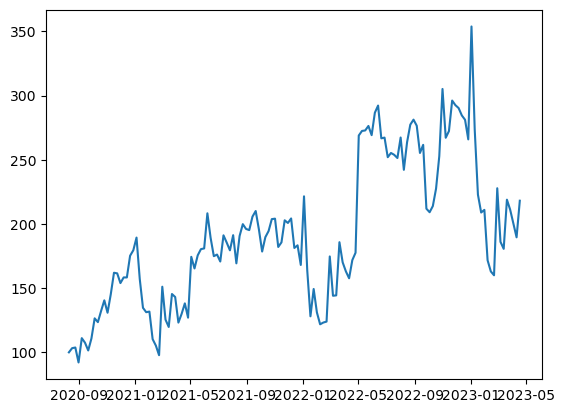

In [11]:
plt.plot(RT_LBCI_Halifax['Date'], RT_LBCI_Halifax['Value'])

Since the RT-LBCI is weekly data, we will convert them into monthly data.
Add four weeks and divide by 4 to get the monthly data.

In [12]:
RT_LBCI_Halifax_monthly = convert_monthly(RT_LBCI_Halifax)
RT_LBCI_Halifax_monthly.head()

,Date,Value
0,2020-08-01,99.7825
1,2020-09-01,107.7150
2,2020-10-01,130.6950
3,2020-11-01,150.7020
4,2020-12-01,167.8600


## Labor Force - Unemployment Rate


Labour force characteristics, three-month moving average, unadjusted for seasonality c 1

Frequency: Monthly

Table: 14-10-0378-01    

Release date: 2023-04-06

Geography: Census metropolitan area, Census metropolitan area part

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1410037801

Labour force characteristics	Unemployment rate 2

Sex	Both sexes

Age group	15 years and over

Geography 3 4	November 2022

In [13]:
unemploy_rate_path = '/Users/gawain/Desktop/6.Real-time Local Business Condition Index/Labour force/Labor Force Rate/1410037801-cleaned.csv'
unemploy_rate_df = pd.read_csv(unemploy_rate_path)
unemploy_rate_df.head()

FileNotFoundError: [Errno 2] No such file or directory: '/Users/gawain/Desktop/6.Real-time Local Business Condition Index/Labour force/Labor Force Rate/1410037801-cleaned.csv'

In [9]:
unemploy_rate_halifax = unemploy_rate_df.iloc[1:2]
unemploy_rate_halifax = convert_combined(unemploy_rate_halifax)
unemploy_rate_halifax.head()

,Date,Value
0,2020-09-01,8.7
1,2020-10-01,7.7
2,2020-11-01,6.3
3,2020-12-01,7.0
4,2021-01-01,7.5


In [10]:
Halifax_df_combined = pd.merge(RT_LBCI_Halifax_monthly, unemploy_rate_halifax, on='Date')
Halifax_df_combined = Halifax_df_combined.rename(columns={'Value_x': 'RT_LBCI_monthly', 'Value_y': 'Unemployment Rate'})
Halifax_df_combined.head()

,Date,RT_LBCI_monthly,Unemployment Rate
0,2020-09-01,107.7150,8.7
1,2020-10-01,130.6950,7.7
2,2020-11-01,150.7020,6.3
3,2020-12-01,167.8600,7.0
4,2021-01-01,153.1375,7.5


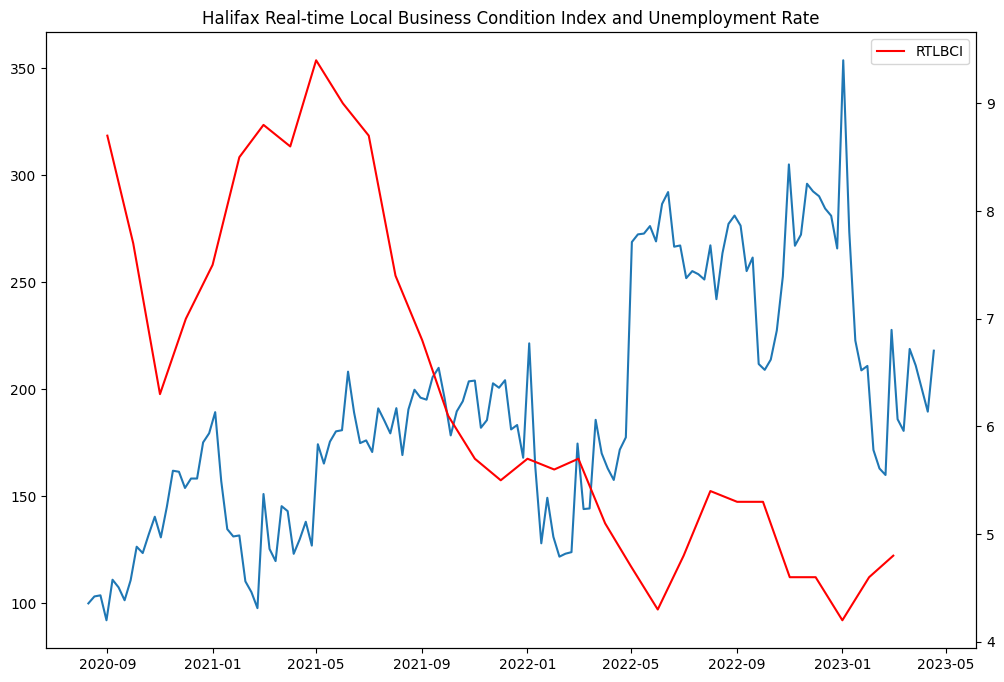

In [11]:
# combine the plot of the two dataframes
plt.figure(figsize=(12, 8))
plt.plot(RT_LBCI_Halifax['Date'], RT_LBCI_Halifax['Value'])
# plot with 2 y-axis
plt.twinx()
plt.plot(unemploy_rate_halifax['Date'], unemploy_rate_halifax['Value'], color='red')
plt.title('Halifax Real-time Local Business Condition Index and Unemployment Rate')
plt.legend(['RTLBCI', 'Unemployment Rate'])
plt.show();

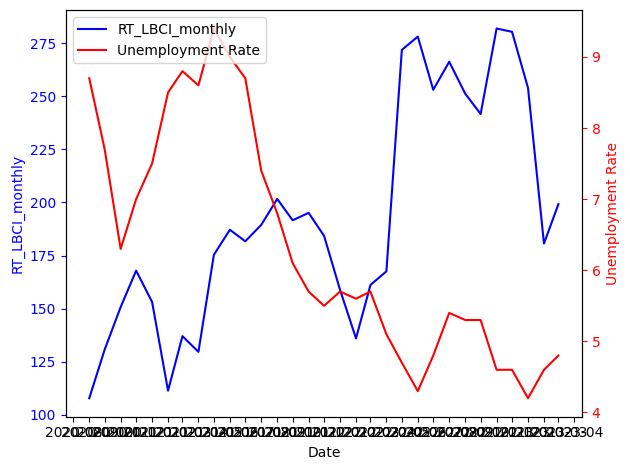

In [12]:
import matplotlib.dates as mdates

Halifax_df_combined['Date'] = pd.to_datetime(Halifax_df_combined['Date'])

# Plot RT_LBCI_monthly with a blue color and label
fig, ax1 = plt.subplots()
ax1.plot(Halifax_df_combined['Date'], Halifax_df_combined['RT_LBCI_monthly'], 'b-', label='RT_LBCI_monthly')
ax1.set_xlabel('Date')
ax1.set_ylabel('RT_LBCI_monthly', color='b')
ax1.tick_params('y', colors='b')

# Format date axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# Create a second y-axis for the Unemployment Rate, plot it with a red color and label
ax2 = ax1.twinx()
ax2.plot(Halifax_df_combined['Date'], Halifax_df_combined['Unemployment Rate'], 'r-', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate', color='r')
ax2.tick_params('y', colors='r')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# Adjust the plot layout
fig.tight_layout()

# Show the plot
plt.show()

## Population quarterly (haven't used yet)

Population estimates, quarterly 1 2 3 4

Frequency: Quarterly

Table: 17-10-0009-01 (formerly CANSIM 051-0005)

Release date: 2023-03-22

Geography: Canada, Province or territory

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1710000901&cubeTimeFrame.startMonth=01&cubeTimeFrame.startYear=2020&cubeTimeFrame.endMonth=01&cubeTimeFrame.endYear=2023&referencePeriods=20200101%2C20230101


## Electric power generation

Generation by type of electricity 1 2

Frequency: Monthly

Table: 25-10-0015-01 (formerly CANSIM 127-0002)

Geography: Canada, Province or territory

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510001501 

In [13]:
ele_NS = pd.read_csv('/Users/gawain/Desktop/6.Real-time Local Business Condition Index/Electric power generation/NS/2510001501-NS-cleaned.csv')
ele_NS.head()

,Type of electricity generation,September 2020,October 2020,November 2020,December 2020,January 2021,February 2021,March 2021,April 2021,May 2021,...,April 2022,May 2022,June 2022,July 2022,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Total all types of electricity generation,"646,301","671,220","722,094","829,737","980,708","925,651","933,791","681,770","655,406",...,"716,936","658,776","611,797","667,861","694,314","578,522","590,762","663,184","905,752","950,984"
2,Hydraulic turbine 3,"18,318","23,118","38,000","84,350","88,301","75,196","82,365","120,135","90,151",...,"122,556","132,798","29,128","26,805","9,799","14,392","35,493","45,022","93,794","156,037"
3,Conventional steam turbine 4,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,Nuclear steam turbine 5,..,..,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [14]:
ele_NS_Total = ele_NS[ele_NS['Type of electricity generation'] == 'Total all types of electricity generation']
ele_NS_Total

,Type of electricity generation,September 2020,October 2020,November 2020,December 2020,January 2021,February 2021,March 2021,April 2021,May 2021,...,April 2022,May 2022,June 2022,July 2022,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023
1,Total all types of electricity generation,"646,301","671,220","722,094","829,737","980,708","925,651","933,791","681,770","655,406",...,"716,936","658,776","611,797","667,861","694,314","578,522","590,762","663,184","905,752","950,984"


In [15]:
ele_NS_total = convert_combined(ele_NS_Total)
ele_NS_total.head()

,Date,Value
0,2020-09-01,646301.0
1,2020-10-01,671220.0
2,2020-11-01,722094.0
3,2020-12-01,829737.0
4,2021-01-01,980708.0


In [16]:
Halifax_df_combined = pd.merge(Halifax_df_combined, ele_NS_total, on='Date')
Halifax_df_combined = Halifax_df_combined.rename(columns={'Value': 'Electricity generation'})
Halifax_df_combined.head()

,Date,RT_LBCI_monthly,Unemployment Rate,Electricity generation
0,2020-09-01,107.7150,8.7,646301.0
1,2020-10-01,130.6950,7.7,671220.0
2,2020-11-01,150.7020,6.3,722094.0
3,2020-12-01,167.8600,7.0,829737.0
4,2021-01-01,153.1375,7.5,980708.0


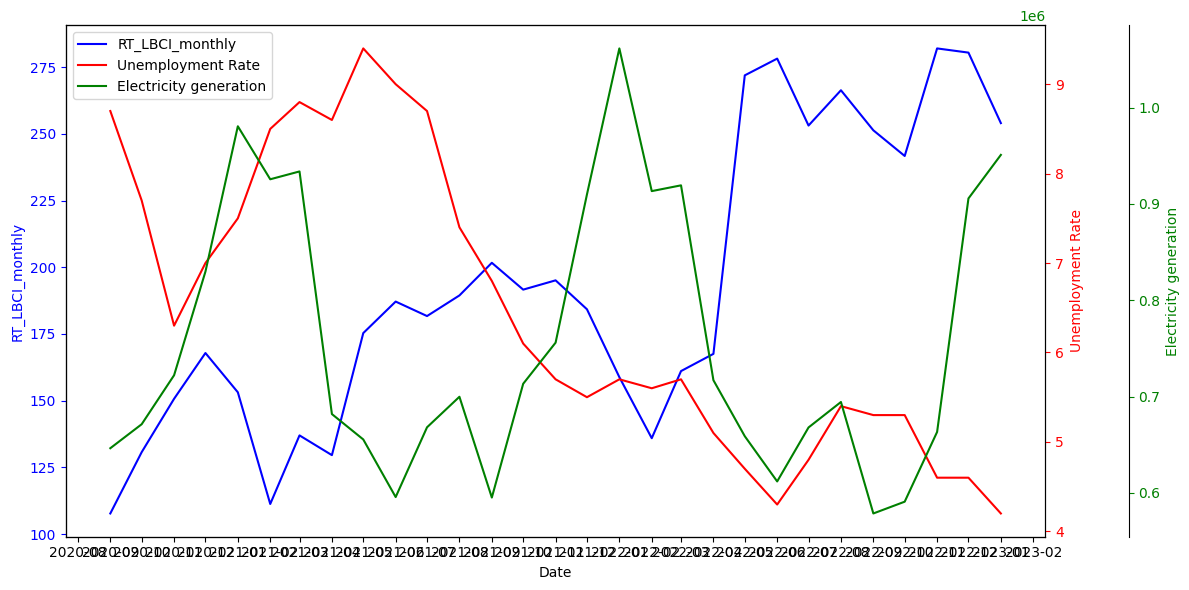

In [17]:
# Plot RT_LBCI_monthly with a blue color and label
# fig, ax1 = plt.subplots()
fig, ax1 = plt.subplots(figsize=(12, 6))

ax1.plot(Halifax_df_combined['Date'], Halifax_df_combined['RT_LBCI_monthly'], 'b-', label='RT_LBCI_monthly')
ax1.set_xlabel('Date')
ax1.set_ylabel('RT_LBCI_monthly', color='b')
ax1.tick_params('y', colors='b')

# Format date axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# Create a second y-axis for the Unemployment Rate, plot it with a red color and label
ax2 = ax1.twinx()
ax2.plot(Halifax_df_combined['Date'], Halifax_df_combined['Unemployment Rate'], 'r-', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate', color='r')
ax2.tick_params('y', colors='r')

# Create a third y-axis for the Electricity generation, plot it with a green color and label
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(Halifax_df_combined['Date'], Halifax_df_combined['Electricity generation'], 'g-', label='Electricity generation')
ax3.set_ylabel('Electricity generation', color='g')
ax3.tick_params('y', colors='g')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# Adjust the plot layout
fig.tight_layout()

# Show the plot
plt.show()


## Consumer Price Index

Frequency: Monthly

Table: 18-10-0004-01 (formerly CANSIM 326-0020)

Release date: 2023-04-18

Geography: Canada, Province or territory, Census subdivision, Census metropolitan area, Census metropolitan area part

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1810000401

In [18]:
cpi_ns_path = '/Users/gawain/Desktop/6.Real-time Local Business Condition Index/CPI/NS/1810000401-NS-cleaned.csv'
cpi_ns_df = pd.read_csv(cpi_ns_path)
cpi_ns_df.head()

,Products and product groups 3 4,September 2020,October 2020,November 2020,December 2020,January 2021,February 2021,March 2021,April 2021,May 2021,...,June 2022,July 2022,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023,February 2023,March 2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,All-items,137.5,138.4,138.7,138.7,140.3,140.8,141.8,142.3,143.1,...,156.5,156.7,155.7,155.2,157.1,158.5,156.4,157.3,158.4,158.4
2,Food 5,155.9,156.1,157.2,156.9,158.2,158.0,158.9,158.0,160.2,...,174.8,177.1,177.6,179.8,179.2,182.7,181.4,184.7,185.8,187.6
3,Shelter 6,149.1,149.9,150.8,152.4,152.9,153.9,156.0,155.9,156.0,...,171.6,172.1,170.6,171.3,175.0,178.9,176.1,175.2,178.6,175.7
4,"Household operations, furnishings and equipment",121.9,123.0,122.6,122.0,123.6,122.8,121.0,122.4,122.6,...,127.7,128.0,128.4,129.0,129.8,128.7,128.9,129.1,130.1,129.7


In [19]:
# select the CPI for all items
cpi_ns_all = cpi_ns_df[cpi_ns_df['Products and product groups 3 4'] == 'All-items']
cpi_ns_all.head()

,Products and product groups 3 4,September 2020,October 2020,November 2020,December 2020,January 2021,February 2021,March 2021,April 2021,May 2021,...,June 2022,July 2022,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023,February 2023,March 2023
1,All-items,137.5,138.4,138.7,138.7,140.3,140.8,141.8,142.3,143.1,...,156.5,156.7,155.7,155.2,157.1,158.5,156.4,157.3,158.4,158.4


In [20]:
cpi_ns_all = convert_combined(cpi_ns_all)
cpi_ns_all.head()

,Date,Value
0,2020-09-01,137.5
1,2020-10-01,138.4
2,2020-11-01,138.7
3,2020-12-01,138.7
4,2021-01-01,140.3


In [21]:
Halifax_df_combined = pd.merge(Halifax_df_combined, cpi_ns_all, on='Date')
Halifax_df_combined = Halifax_df_combined.rename(columns={'Value': 'CPI'})
Halifax_df_combined.head()

,Date,RT_LBCI_monthly,Unemployment Rate,Electricity generation,CPI
0,2020-09-01,107.7150,8.7,646301.0,137.5
1,2020-10-01,130.6950,7.7,671220.0,138.4
2,2020-11-01,150.7020,6.3,722094.0,138.7
3,2020-12-01,167.8600,7.0,829737.0,138.7
4,2021-01-01,153.1375,7.5,980708.0,140.3


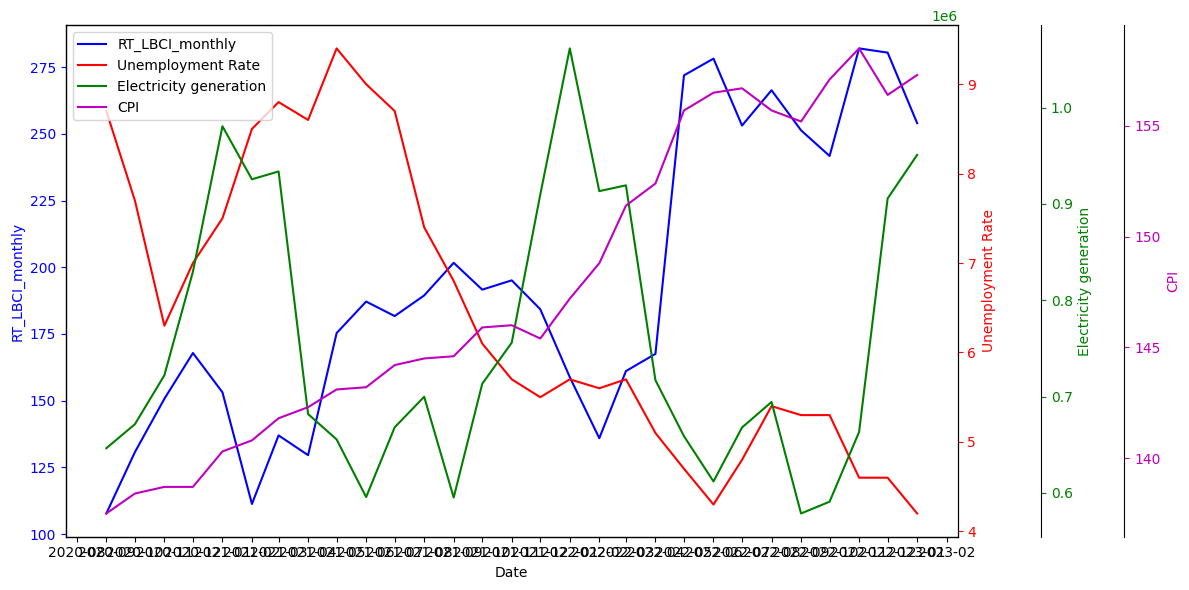

In [22]:
Halifax_df_combined['Date'] = pd.to_datetime(Halifax_df_combined['Date'])

# Set the figure size (width, height) in inches
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot RT_LBCI_monthly with a blue color and label
ax1.plot(Halifax_df_combined['Date'], Halifax_df_combined['RT_LBCI_monthly'], 'b-', label='RT_LBCI_monthly')
ax1.set_xlabel('Date')
ax1.set_ylabel('RT_LBCI_monthly', color='b')
ax1.tick_params('y', colors='b')

# Format date axis
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
ax1.xaxis.set_major_locator(mdates.MonthLocator())

# Create a second y-axis for the Unemployment Rate, plot it with a red color and label
ax2 = ax1.twinx()
ax2.plot(Halifax_df_combined['Date'], Halifax_df_combined['Unemployment Rate'], 'r-', label='Unemployment Rate')
ax2.set_ylabel('Unemployment Rate', color='r')
ax2.tick_params('y', colors='r')

# Create a third y-axis for the Electricity generation, plot it with a green color and label
ax3 = ax1.twinx()
ax3.spines['right'].set_position(('outward', 60))
ax3.plot(Halifax_df_combined['Date'], Halifax_df_combined['Electricity generation'], 'g-', label='Electricity generation')
ax3.set_ylabel('Electricity generation', color='g')
ax3.tick_params('y', colors='g')

# Create a fourth y-axis for the CPI, plot it with a purple color and label
ax4 = ax1.twinx()
ax4.spines['right'].set_position(('outward', 120))
ax4.plot(Halifax_df_combined['Date'], Halifax_df_combined['CPI'], 'm-', label='CPI')
ax4.set_ylabel('CPI', color='m')
ax4.tick_params('y', colors='m')

# Add a legend
fig.legend(loc="upper left", bbox_to_anchor=(0,1), bbox_transform=ax1.transAxes)

# Adjust the plot layout
fig.tight_layout()

# Show the plot
plt.show()


## Estimates for business openings and closures

Experimental estimates for business openings and closures for Canada, provinces and territories, census metropolitan areas, seasonally adjusted

Frequency: Monthly

Table: 33-10-0270-01

Release date: 2023-04-25

Geography: Canada, Province or territory, Census metropolitan area

https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3310027001

**Question: There are 4 business statuses, how to choose?**

In [23]:
EBOC_path = '/Users/gawain/Desktop/6.Real-time Local Business Condition Index/Estimates for business openings and closures/Business sector industries/Halifax - NS/3310027001-cleaned.csv'
EBOC_df = pd.read_csv(EBOC_path)
EBOC_df.head()

,Business dynamics measure,September 2020,October 2020,November 2020,December 2020,January 2021,February 2021,March 2021,April 2021,May 2021,...,April 2022,May 2022,June 2022,July 2022,August 2022,September 2022,October 2022,November 2022,December 2022,January 2023
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Active businesses 3,"9,488","9,566","9,629","9,724","9,815","9,867","9,915","9,909","9,866",...,"10,633","10,647","10,695","10,709","10,701","10,722","10,723","10,737","10,758","10,815"
2,Opening businesses 4,454,434,455,438,440,425,401,382,350,...,455,412,380,490,408,426,424,418,428,395
3,Continuing businesses 5,"9,017","9,172","9,215","9,294","9,394","9,455","9,515","9,507","9,502",...,"10,155","10,218","10,282","10,252","10,287","10,288","10,336","10,345","10,338","10,458"
4,Closing businesses,306,303,380,321,337,352,353,392,394,...,396,399,331,432,440,430,423,414,408,329


In [24]:
# I will take the contuning business as the example
EBOC_continuing = EBOC_df[EBOC_df['Business dynamics measure'] == 'Continuing businesses 5']
EBOC_continuing = convert_combined(EBOC_continuing)

EBOC_continuing.head()

,Date,Value
0,2020-09-01,9017.0
1,2020-10-01,9172.0
2,2020-11-01,9215.0
3,2020-12-01,9294.0
4,2021-01-01,9394.0


In [26]:
Halifax_df_combined = pd.merge(Halifax_df_combined, EBOC_continuing, on='Date')
Halifax_df_combined = Halifax_df_combined.rename(columns={'Value': 'Continuing businesses'})
Halifax_df_combined.head()

,Date,RT_LBCI_monthly,Unemployment Rate,Electricity generation,CPI,Continuing businesses
0,2020-09-01,107.7150,8.7,646301.0,137.5,9017.0
1,2020-10-01,130.6950,7.7,671220.0,138.4,9172.0
2,2020-11-01,150.7020,6.3,722094.0,138.7,9215.0
3,2020-12-01,167.8600,7.0,829737.0,138.7,9294.0
4,2021-01-01,153.1375,7.5,980708.0,140.3,9394.0


# Plotly

In [33]:
# Halifax_df_combined = pd.DataFrame(data)
Halifax_df_combined['Date'] = pd.to_datetime(Halifax_df_combined['Date'])

# Create the plot with Plotly
fig = go.Figure()

# Add RT_LBCI_monthly trace
fig.add_trace(go.Scatter(x=Halifax_df_combined['Date'],
                              y=Halifax_df_combined['RT_LBCI_monthly'],
                              name='RT_LBCI_monthly',
                              line=dict(color='blue')))

# Add Unemployment Rate trace
fig.add_trace(go.Scatter(x=Halifax_df_combined['Date'],
                              y=Halifax_df_combined['Unemployment Rate'],
                              name='Unemployment Rate',
                              line=dict(color='red'),
                              yaxis='y2'))

# Add Electricity generation trace
fig.add_trace(go.Scatter(x=Halifax_df_combined['Date'],
                              y=Halifax_df_combined['Electricity generation'],
                              name='Electricity generation',
                              line=dict(color='green'),
                              yaxis='y3'))

# Add CPI trace
fig.add_trace(go.Scatter(x=Halifax_df_combined['Date'],
                              y=Halifax_df_combined['CPI'],
                              name='CPI',
                              line=dict(color='purple'),
                              yaxis='y4'))

# Add Continuing businesses trace
fig.add_trace(go.Scatter(x=Halifax_df_combined['Date'],
                              y=Halifax_df_combined['Continuing businesses'],
                              name='Continuing businesses',
                              line=dict(color='orange'),
                              yaxis='y5'))

# Update the layout
fig.update_layout(
      xaxis=dict(domain=[0.1, 0.9]),
      yaxis=dict(title='RT_LBCI_monthly', titlefont=dict(color='blue'), tickfont=dict(color='blue')),
      yaxis2=dict(title='Unemployment Rate', titlefont=dict(color='red'), tickfont=dict(color='red'), anchor='free', overlaying='y', side='right', position=1),
      yaxis3=dict(title='Electricity generation', titlefont=dict(color='green'), tickfont=dict(color='green'), anchor='free', overlaying='y', side='right', position=0.9),
      yaxis4=dict(title='CPI', titlefont=dict(color='purple'), tickfont=dict(color='purple'), anchor='free', overlaying='y', side='right', position=0.8),
      yaxis5=dict(title='Continuing businesses', titlefont=dict(color='orange'), tickfont=dict(color='orange'), anchor='free', overlaying='y', side='right', position=0.7),
      showlegend=True,
)

# Update x-axis grid lines
fig.update_xaxes(showgrid=True, gridwidth=1, gridcolor='LightGrey')

# Update y-axis grid lines
fig.update_yaxes(showgrid=False, gridwidth=1, gridcolor='LightGrey', zeroline=True)

# Show the plot
fig.show()

### Correlation Matrix

In [34]:
Halifax_df_combined.head()
scaled_Halifax_df_combined = Halifax_df_combined.copy()
scaled_Halifax_df_combined = scaled_Halifax_df_combined.drop(['Date'], axis=1)

# normalize the data
scaled_Halifax_df_combined = (scaled_Halifax_df_combined - scaled_Halifax_df_combined.min()) / (scaled_Halifax_df_combined.max() - scaled_Halifax_df_combined.min())
scaled_Halifax_df_combined.head()

# find the correlation matrix for Halifax_df_combined
corr_matrix = Halifax_df_combined.corr()
corr_matrix

/var/folders/xb/ck19r6wj3s34sw5xpnr7_fbm0000gp/T/ipykernel_6159/974165628.py:10: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,RT_LBCI_monthly,Unemployment Rate,Electricity generation,CPI,Continuing businesses
RT_LBCI_monthly,1.000000,-0.716979,-0.314584,0.862470,0.812573
Unemployment Rate,-0.716979,1.000000,-0.077743,-0.819694,-0.814019
Electricity generation,-0.314584,-0.077743,1.000000,-0.132572,-0.048703
CPI,0.862470,-0.819694,-0.132572,1.000000,0.985579
Continuing businesses,0.812573,-0.814019,-0.048703,0.985579,1.000000


/var/folders/xb/ck19r6wj3s34sw5xpnr7_fbm0000gp/T/ipykernel_6159/835068695.py:3: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



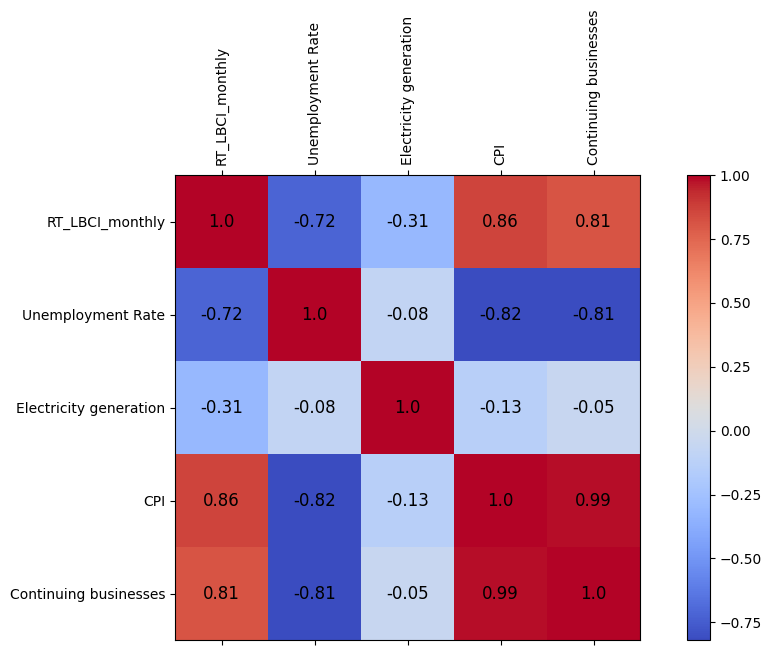

In [35]:
import numpy as np

corr_matrix = Halifax_df_combined.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 6))
plt.matshow(corr_matrix, fignum=1, cmap='coolwarm')
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation='vertical')
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)

# Add the correlation values to each grid
for i in range(len(corr_matrix.columns)):
      for j in range(len(corr_matrix.columns)):
            text = plt.text(j, i, np.round(corr_matrix.iloc[i, j], 2),
                        ha="center", va="center", color="black", fontsize=12)

plt.colorbar()
plt.show()

- Looks like CPI and Continuing business do not have strong correlation with RT-LBCI, but might have a strong co-linearity with it.
- While CPI and Continuing business do have strong correlations with Unemployment rate.

In [5]:
# Take Vancouver as an example
RT_LBCI_Van = RT_LBCI_df.iloc[28:29]
RT_LBCI_Van = convert_combined(RT_LBCI_Van)
RT_LBCI_Van

#RT_LBCI_df.head()
RT_LBCI_Van_monthly = convert_monthly(RT_LBCI_Van)
RT_LBCI_Van_monthly.head()


,Date,Value
0,2020-08-01,101.6275
1,2020-09-01,108.2250
2,2020-10-01,131.3425
3,2020-11-01,139.9400
4,2020-12-01,156.8725


In [6]:
# Gas and diesel price
df_gas = pd.read_csv('~/Desktop/UBC/DATA 599 Capstone/RT-LBCI/Cleaned datasets/regular_gasoline_retail_price.csv')
df_diesel = pd.read_csv('~/Desktop/UBC/DATA 599 Capstone/RT-LBCI/Cleaned datasets/diesel_retail_price.csv')

# extract columns Date and Vancouver
df_gas_Van = df_gas[['Date', 'Vancouver']]
df_diesel_Van = df_diesel[['Date', 'Vancouver']]


In [12]:
# Convert the date format
RT_LBCI_Van_monthly['Date'] = pd.to_datetime(RT_LBCI_Van_monthly['Date'])
df_gas_Van['Date'] = pd.to_datetime(df_gas_Van['Date'])
df_diesel_Van['Date'] = pd.to_datetime(df_diesel_Van['Date'])

Van_df_combined = pd.merge(RT_LBCI_Van_monthly, df_gas_Van, on = 'Date')
Van_df_combined = Van_df_combined.rename(columns={'Value': 'RT_LBCI_monthly', 'Vancouver': 'Gas'})
Van_df_combined = pd.merge(Van_df_combined, df_diesel_Van, on='Date')
Van_df_combined = Van_df_combined.rename(columns={ 'Vancouver': 'Diese'})

Van_df_combined.head()

/var/folders/7s/086nw8893dq343kp9p40cjdw0000gn/T/ipykernel_21569/3874644773.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gas_Van['Date'] = pd.to_datetime(df_gas_Van['Date'])
/var/folders/7s/086nw8893dq343kp9p40cjdw0000gn/T/ipykernel_21569/3874644773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_diesel_Van['Date'] = pd.to_datetime(df_diesel_Van['Date'])


,Date,RT_LBCI_monthly,Gas,Diese
0,2020-08-01,101.6275,130.0,110.7
1,2020-09-01,108.2250,125.9,108.3
2,2020-10-01,131.3425,122.3,109.3
3,2020-11-01,139.9400,123.6,116.1
4,2020-12-01,156.8725,126.1,117.8


In [13]:
Van_df_combined.corr()

,RT_LBCI_monthly,Gas,Diese
RT_LBCI_monthly,1.000000,0.757341,0.830977
Gas,0.757341,1.000000,0.959184
Diese,0.830977,0.959184,1.000000


In [14]:
Van_df_combined.head()
scaled_Van_df_combined = Van_df_combined.copy()
scaled_Van_df_combined = scaled_Van_df_combined.drop(['Date'], axis=1)

# normalize the data
scaled_Van_df_combined = (scaled_Van_df_combined - scaled_Van_df_combined.min()) / (scaled_Van_df_combined.max() - scaled_Van_df_combined.min())
scaled_Van_df_combined.head()

# find the correlation matrix for Halifax_df_combined
corr_matrix = Van_df_combined.corr()
corr_matrix

,RT_LBCI_monthly,Gas,Diese
RT_LBCI_monthly,1.000000,0.757341,0.830977
Gas,0.757341,1.000000,0.959184
Diese,0.830977,0.959184,1.000000
